In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import necessary libraries
import pandas as pd



# Read the dataset

crop_yield_df = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')

# Display dataset info
print("\n🔹 Dataset Shape:", crop_yield_df.shape)
print("\n🔹 First 5 Rows:\n", crop_yield_df.head())

# Check for missing values
print("\n🔍 Missing Values:\n", crop_yield_df.isnull().sum())

# Check data types of each column
print("\n🔍 Column Data Types:\n", crop_yield_df.dtypes)



🔹 Dataset Shape: (19689, 10)

🔹 First 5 Rows:
            Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  

🔍 Missing Values:
 Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer      

In [6]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['Crop', 'Season', 'State']

# Apply label encoding
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    crop_yield_df[col] = label_encoders[col].fit_transform(crop_yield_df[col])

# Display first few rows after encoding
print("\n🔹 Data After Encoding:\n", crop_yield_df.head())



🔹 Data After Encoding:
    Crop  Crop_Year  Season  State     Area  Production  Annual_Rainfall  \
0     0       1997       4      2  73814.0       56708           2051.4   
1     1       1997       1      2   6637.0        4685           2051.4   
2     8       1997       1      2    796.0          22           2051.4   
3     9       1997       4      2  19656.0   126905000           2051.4   
4    11       1997       1      2   1739.0         794           2051.4   

   Fertilizer  Pesticide        Yield  
0  7024878.38   22882.34     0.796087  
1   631643.29    2057.47     0.710435  
2    75755.32     246.76     0.238333  
3  1870661.52    6093.36  5238.051739  
4   165500.63     539.09     0.420909  


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Apply scaling
crop_yield_df[numerical_columns] = scaler.fit_transform(crop_yield_df[numerical_columns])

# Display first few rows after scaling
print("\n🔹 Data After Scaling:\n", crop_yield_df.head())



🔹 Data After Scaling:
    Crop  Crop_Year  Season  State      Area  Production  Annual_Rainfall  \
0     0       1997       4      2 -0.144802   -0.062267         0.751197   
1     1       1997       1      2 -0.236473   -0.062464         0.751197   
2     8       1997       1      2 -0.244443   -0.062482         0.751197   
3     9       1997       4      2 -0.218707    0.419954         0.751197   
4    11       1997       1      2 -0.243157   -0.062479         0.751197   

   Fertilizer  Pesticide     Yield  
0   -0.179880  -0.121745 -0.090128  
1   -0.247217  -0.219385 -0.090225  
2   -0.253072  -0.227875 -0.090763  
3   -0.234167  -0.200462  5.872928  
4   -0.252127  -0.226504 -0.090555  


<ipython-input-8-34aaced90d2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=crop_yield_df["Crop"], palette="viridis")


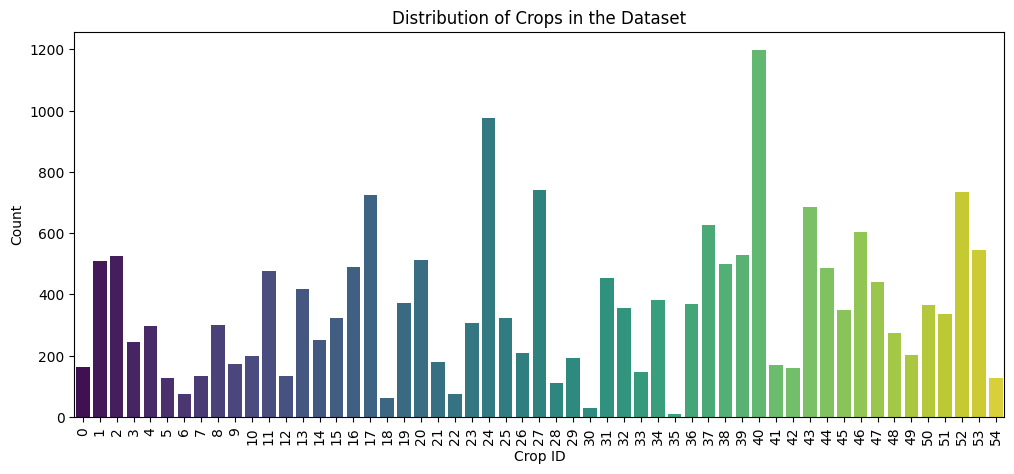

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each crop
plt.figure(figsize=(12, 5))
sns.countplot(x=crop_yield_df["Crop"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Crops in the Dataset")
plt.xlabel("Crop ID")
plt.ylabel("Count")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = crop_yield_df.drop(columns=["Yield", "Crop_Year"])  # Exclude 'Crop_Year' as it's not needed
y = crop_yield_df["Yield"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("🔹 Training Data Shape:", X_train.shape)
print("🔹 Testing Data Shape:", X_test.shape)


🔹 Training Data Shape: (15751, 8)
🔹 Testing Data Shape: (3938, 8)


In [11]:
# Compute RMSE manually using square root
import numpy as np
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # RMSE
r2_lr = r2_score(y_test, y_pred_lr)  # R² Score

print("🔹 Linear Regression RMSE:", rmse_lr)
print("🔹 Linear Regression R² Score:", r2_lr)


🔹 Linear Regression RMSE: 0.7890130442770201
🔹 Linear Regression R² Score: 0.40065670832267


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5  # RMSE (Square root of MSE)

r2_rf = r2_score(y_test, y_pred_rf)  # R² Score

print("🔹 Random Forest RMSE:", rmse_rf)
print("🔹 Random Forest R² Score:", r2_rf)


🔹 Random Forest RMSE: 0.31658513941057137
🔹 Random Forest R² Score: 0.9035086611235986


<ipython-input-14-a292244d0354>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")


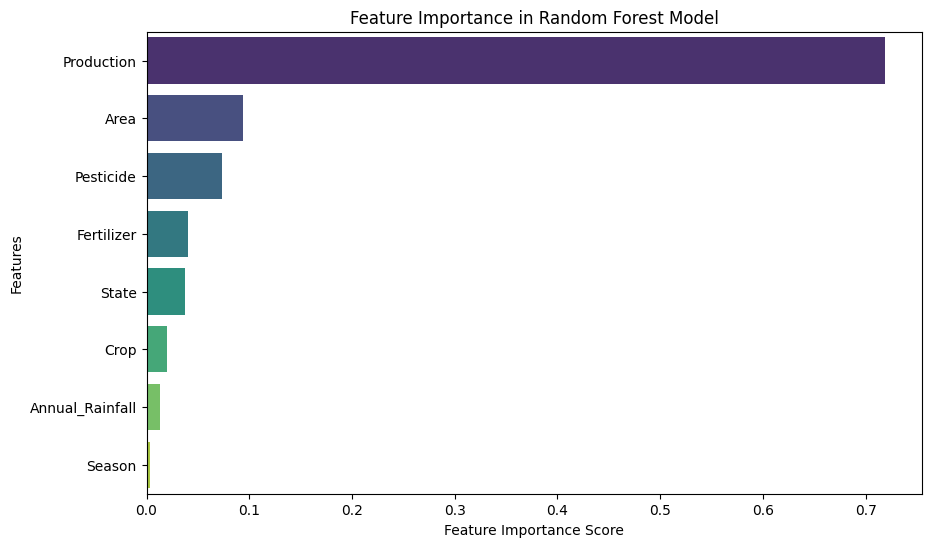

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the tuned model
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Performance Metrics
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf) ** 0.5  # Taking square root manually

r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"🔹 Tuned Random Forest RMSE: {rmse_best_rf}")
print(f"🔹 Tuned Random Forest R² Score: {r2_best_rf}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
🔹 Tuned Random Forest RMSE: 0.3267511609309462
🔹 Tuned Random Forest R² Score: 0.8972122023480747


In [17]:
!pip install xgboost


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)  # ✅ Use X_test instead of y_test

rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5  # ✅ Manually compute RMSE
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔹 XGBoost RMSE: {rmse_xgb}")
print(f"🔹 XGBoost R² Score: {r2_xgb}")


🔹 XGBoost RMSE: 0.3725944672590718
🔹 XGBoost R² Score: 0.8663465770889864


In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_tuned = RandomizedSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error', n_iter=10, n_jobs=-1)
xgb_tuned.fit(X_train, y_train)

print("Best Parameters:", xgb_tuned.best_params_)
y_pred_xgb_best = xgb_tuned.best_estimator_.predict(X_test)

rmse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best) ** 0.5
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print(f"🔹 Tuned XGBoost RMSE: {rmse_xgb_best}")
print(f"🔹 Tuned XGBoost R² Score: {r2_xgb_best}")


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
🔹 Tuned XGBoost RMSE: 0.2536690776545385
🔹 Tuned XGBoost R² Score: 0.9380498529000239


In [23]:
import joblib

joblib.dump(xgb_tuned.best_estimator_, "/content/drive/MyDrive/tuned_xgboost_model.pkl")
print("Model saved successfully!")


Model saved successfully!


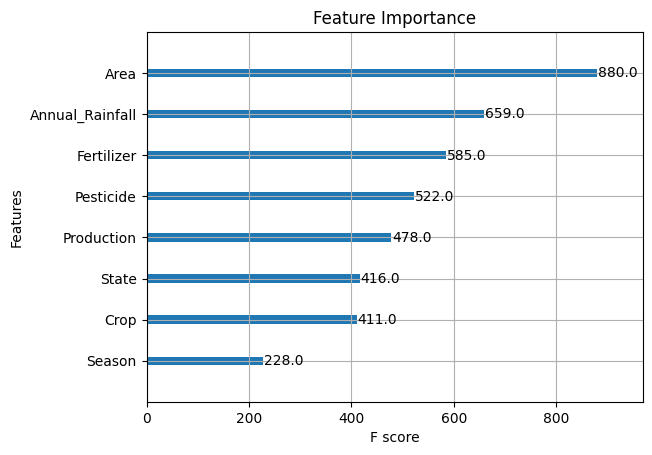

In [24]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_tuned.best_estimator_, importance_type="weight")
plt.title("Feature Importance")
plt.show()


yaha se kaam kaa nhi haa

In [30]:
import pandas as pd

# Creating a small test dataset manually
new_data = pd.DataFrame({
    'Crop': ['Wheat', 'Rice', 'Maize'],
    'Season': ['Rabi', 'Kharif', 'Kharif'],
    'State': ['Punjab', 'West Bengal', 'Madhya Pradesh'],
    'Area': [200, 150, 180],
    'Production': [500, 400, 450],
    'Annual_Rainfall': [800, 1200, 950],
    'Fertilizer': [50, 60, 55],
    'Pesticide': [20, 25, 22]
})

print(new_data)


    Crop  Season           State  Area  Production  Annual_Rainfall  \
0  Wheat    Rabi          Punjab   200         500              800   
1   Rice  Kharif     West Bengal   150         400             1200   
2  Maize  Kharif  Madhya Pradesh   180         450              950   

   Fertilizer  Pesticide  
0          50         20  
1          60         25  
2          55         22  


In [31]:
print(X_train.dtypes)


Crop                 int64
Season               int64
State                int64
Area               float64
Production         float64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
dtype: object


In [32]:
print(X_train.columns)


Index(['Crop', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall',
       'Fertilizer', 'Pesticide'],
      dtype='object')


In [33]:
print(X_train['Crop'].unique())  # Example for 'Crop'


[17  4 28 11 42 40 29 43 24 32  0 50 15 20  1 52 34 13  2 38 10 21 54 27
 53 51 37 19 23 41 31  3 12 16  8 36 49 46 44 26 39 25 47 48  5 33 22  9
 45  7 14  6 18 30 35]


In [35]:
from sklearn.preprocessing import LabelEncoder

# Recreate the encoders
crop_encoder = LabelEncoder()
season_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit the encoders on original training data
crop_encoder.fit(X_train['Crop'])
season_encoder.fit(X_train['Season'])
state_encoder.fit(X_train['State'])


LabelEncoder()

In [36]:
import pandas as pd

# Manually create a small test dataset
new_data = pd.DataFrame({
    'Crop': ['Wheat'],
    'Season': ['Rabi'],
    'State': ['Punjab'],
    'Area': [200],
    'Production': [500],
    'Annual_Rainfall': [800],
    'Fertilizer': [50],
    'Pesticide': [20]
})

# Apply label encoding (ensure the same encoders are used!)
new_data['Crop'] = crop_encoder.transform(new_data['Crop'])
new_data['Season'] = season_encoder.transform(new_data['Season'])
new_data['State'] = state_encoder.transform(new_data['State'])

# Convert to float type (optional, for safety)
new_data = new_data.astype(float)

# Run prediction
new_predictions = xgb_tuned.best_estimator_.predict(new_data)
print("Predicted Crop Yield:", new_predictions)


ValueError: invalid literal for int() with base 10: 'Wheat'

In [38]:
import pandas as pd

# Load a small portion of the training data
X_train_sample = X_train.head()

print(X_train_sample[['Crop', 'Season', 'State']])


       Crop  Season  State
19466    17       1      6
17802     4       1      5
7014     28       4     27
14078     4       2     28
8121     11       1     14


In [39]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Recreate encoders
crop_encoder = LabelEncoder()
season_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit on training data
crop_encoder.fit(X_train['Crop'])
season_encoder.fit(X_train['Season'])
state_encoder.fit(X_train['State'])

# Save encoders for future use
with open("crop_encoder.pkl", "wb") as f:
    pickle.dump(crop_encoder, f)

with open("season_encoder.pkl", "wb") as f:
    pickle.dump(season_encoder, f)

with open("state_encoder.pkl", "wb") as f:
    pickle.dump(state_encoder, f)

print("Encoders recreated and saved successfully! ✅")


Encoders recreated and saved successfully! ✅


In [40]:
import joblib

# Load the saved encoders
crop_encoder = joblib.load("crop_encoder.pkl")
season_encoder = joblib.load("season_encoder.pkl")
state_encoder = joblib.load("state_encoder.pkl")


In [42]:
print("Crop Categories:", crop_encoder.classes_)
print("Season Categories:", season_encoder.classes_)
print("State Categories:", state_encoder.classes_)


Crop Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
Season Categories: [0 1 2 3 4 5]
State Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [43]:
print(pd.DataFrame({'Crop': crop_encoder.classes_}))
print(pd.DataFrame({'Season': season_encoder.classes_}))
print(pd.DataFrame({'State': state_encoder.classes_}))


    Crop
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
   Season
0       0
1       1
2       2
3       3
4       4
5       5
    State
0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11
12     12
13     13
14     14
15     15
16     16
17     17
18     18
19     19
20     20
21     21
22     22
23     23
24     24
25     25
26     26
27     27
28     28
29     29


In [45]:
new_data = pd.DataFrame({
    'Crop': [17],  # Replace with correct number
    'Season': [1],  # Replace with correct number
    'State': [6],  # Replace with correct number
    'Area': [200],
    'Production': [500],
    'Annual_Rainfall': [800],
    'Fertilizer': [50],
    'Pesticide': [20]
})


In [46]:
import joblib

# Load the trained model
xgb_model = joblib.load("tuned_xgboost_model.pkl")

# Make predictions
predictions = xgb_model.predict(new_data)

# Print the predictions
print("Predicted Crop Production:", predictions)


Predicted Crop Production: [0.374065]


In [48]:
# Get feature names from trained model
print("Model was trained on features:", xgb_tuned.feature_names_in_)


Model was trained on features: ['Crop' 'Season' 'State' 'Area' 'Production' 'Annual_Rainfall'
 'Fertilizer' 'Pesticide']


In [49]:
# Add a dummy 'Production' column to test data (fill with zeros)
test_df['Production'] = 0

# Check if all required features are now present
print("Test Data Features:", test_df.columns)


Test Data Features: Index(['Crop', 'Season', 'State', 'Area', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Production'],
      dtype='object')


In [51]:
# Drop 'Production' column from test data
test_df = test_df.drop(columns=['Production'], errors='ignore')

# Check the updated test data
print("Updated Test Data Features:", test_df.columns)


Updated Test Data Features: Index(['Crop', 'Season', 'State', 'Area', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide'],
      dtype='object')


In [53]:
# Print the expected features of the trained model
print("Model was trained on features:", xgb_tuned.best_estimator_.feature_names_in_)


Model was trained on features: ['Crop' 'Season' 'State' 'Area' 'Production' 'Annual_Rainfall'
 'Fertilizer' 'Pesticide']


In [ ]:
from sklearn.model_selection import train_test_split

# Load dataset (if not already loaded)
# Ensure 'Production' is the target variable
df = dataset.copy()  # Replace 'dataset' with your actual DataFrame

# Define features and target
X = df.drop(columns=['Production'])  # Remove "Production" from input features
y = df['Production']  # Target variable

# Split into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data successfully split into training and validation sets!")


yaha tak kam nhi haa but isko dekete mat karna


yaha sekaam kaa haa

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test is the actual production values for test data
y_pred = xgb_tuned.best_estimator_.predict(X_test)  # Replace X_test with actual test data

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")


MAE: 0.014842075158754011, RMSE: 0.2536690776545385, R² Score: 0.9380498529000239


In [58]:
import joblib

# Save the trained model
joblib.dump(xgb_tuned.best_estimator_, '/content/drive/MyDrive/crop_prediction_model.pkl')


['/content/drive/MyDrive/crop_prediction_model.pkl']

In [59]:
from google.colab import files
files.download('/content/drive/MyDrive/crop_prediction_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>